In [108]:
import numpy as np
duration=60
dt=0.1
measnoise = 10
accelnoise = 0.2
a = np.matrix([[1, dt],[0, 1]])
b = np.matrix([[dt**2/2],[dt]])
c = np.matrix([1, 0])
x = np.matrix([[0],[0]])
xhat = x
Sz = measnoise**2
Sw = accelnoise**2*np.array([[dt**4/4, dt**3/2],[dt**3/2, dt**2]])
P = Sw
pos = []
poshat=[]
posmeas = []
vel = []
velhat = []

In [109]:
for t in np.arange(0,duration,dt):
    u = 1
    ProcessNoise = accelnoise*np.matrix([[(dt**2/2)*np.random.standard_normal()],[dt*np.random.standard_normal()]])
    x = a*x+b*u+ProcessNoise
    MeasNoise = measnoise * np.random.standard_normal()
    y = c*x+MeasNoise
    xhat = a*xhat + b*u
    Inn = y - c*xhat
    s = c*P*c.T+Sz
    K = a*P*c.T*np.linalg.inv(s)
    xhat = xhat +K*Inn
    P = a*P*a.T-a*P*c.T*np.linalg.inv(s)*c*P*a.T+Sw
    pos.append(x.item((0,0)))
    posmeas.append(y.item((0,0)))
    poshat.append(xhat.item((0,0)))
    vel.append(x.item((1,0)))
    velhat.append(xhat.item((1,0)))

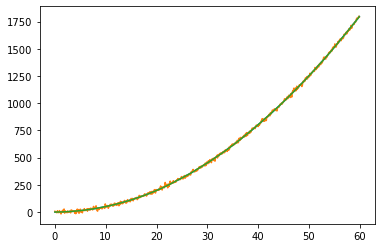

In [110]:
t = np.arange(0,duration,dt)
t=list(t)
import matplotlib.pyplot as plt
plt.plot(t,pos, t, posmeas, t, poshat)

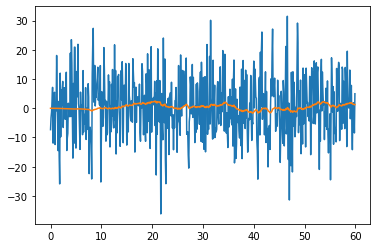

In [115]:
import operator
plt.plot(t,list(map(operator.sub, pos,posmeas)),t,list(map(operator.sub, pos,poshat)))

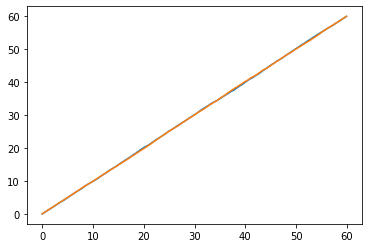

In [116]:
plt.plot(t,vel,t,velhat)

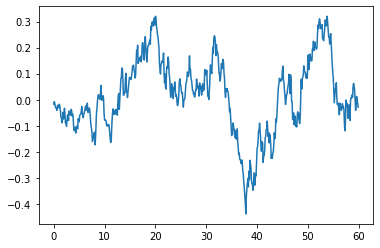

In [117]:
plt.plot(t,list(map(operator.sub, vel,velhat)))

In [105]:
y

matrix([[1809.83052757]])